<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 3. Multilayer Perceptron</font></h1>

<h1><font color="#113D68" size=4>2. Desarrollar una red neuronal</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Conjunto de datos](#section1)
* [2. Cargar datos](#section2)
* [3. Definir modelo](#section3)
* [4. Compilar modelo](#section4)
* [5. Ajustar modelo](#section5)
* [6. Evaluar modelo](#section6)
* [7. Hacer predicciones](#section7)


---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

En esta lección, diseñaremos nuestra primera red neuronal. Después de completar esta lección, sabrá:
* Cómo cargar un conjunto de datos para usar con Keras.
* Cómo diseñar y compilar un modelo de perceptrón multicapa en Keras.
* Cómo evaluar un modelo de Keras.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Conjunto de datos</font>

En este tutorial vamos a utilizar el conjunto de datos Pima Indians Diabetes. Describe los datos de los registros médicos de los pacientes y si tuvieron una aparición de diabetes dentro de los cinco años. Es un problema de clasificación binaria (aparición de diabetes como 1 o 0 si no aparece). Las variables de entrada que describen a cada paciente son numéricas y tienen escalas variables.

Dado que todos los atributos son numéricos, es fácil de usar directamente con redes neuronales que esperan entradas y valores de salida numéricos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede descargar el Dataset desde [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

La precisión de la línea de base si se hacen todas las predicciones ya que no aparece la diabetes es del 65,1%. Los mejores resultados en el conjunto de datos están en el rango de 77,7% de precisión utilizando una validación cruzada de 10 veces.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Cargar datos</font>

VAmos a cargar el archivo directamente usando la función `loadtxt()` de NumPy y establecer dividir las características y target.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

path= "/content/drive/MyDrive/CursoDeepLearning/Datasets/pima-indians-diabetes.csv"

dataset= np.loadtxt(path, delimiter=',')
print(dataset)

[[  6. 148.  72. ... 627.  50.   1.]
 [  1.  85.  66. ... 351.  31.   0.]
 [  8. 183.  64. ... 672.  32.   1.]
 ...
 [  5. 121.  72. ... 245.  30.   0.]
 [  1. 126.  60. ... 349.  47.   1.]
 [  1.  93.  70. ... 315.  23.   0.]]


In [ ]:
x= dataset[:,0:8]
y= dataset[:,8]

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Definir modelo</font>

Los modelos en Keras se definen como una secuencia de capas. Creamos un modelo **Secuencial** y agregamos capas de una en una hasta que estemos satisfechos con nuestra topología de red. 

Lo primero que debe hacer bien es asegurarse de que la capa de entrada tenga el número correcto de entradas. Esto se puede especificar al crear la primera capa con el argumento `input_dim` y establecerlo en 8. 

Pregunta, ¿Cómo sabemos la cantidad de capas que debemos usar y sus tipos? 


En sí el procedimiento a utilizar será:
1. Las capas completamente conectadas se definen mediante la clase `Dense`. Se puede especificar:
    * El número de neuronas en la capa como primer argumento y 
    * Especificar la función de activación usando el parámetro `activation`.
2. Usaremos la función de activación ReLu en las dos primeras capas y la función de activación Sigmoidea en la capa de salida. 
3. Usamos una función de activación sigmoidea en la capa de salida para garantizar que la salida de nuestra red esté entre 0 y 1. 

La siguiente figura proporciona una descripción de la estructura de la red.

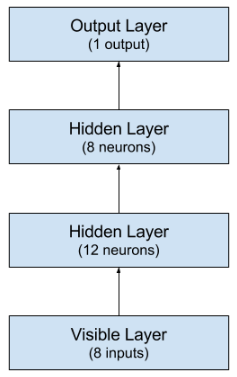



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Defibir modelo keras
model= Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. Compilar modelo</font>

Ahora que el modelo está definido, podemos compilarlo. 

Al compilar, debemos especificar algunas propiedades adicionales requeridas al entrenar la red. 

Debemos especificar:
1. La función de pérdida que se utilizará para evaluar un conjunto de ponderaciones, 
2. El optimizador utilizado para buscar entre diferentes ponderaciones para la red y
3. Cualquier métrica opcional que nos gustaría recopilar e informar durante el entrenamiento. 
    * En este caso usaremos la **pérdida logarítmica**, que para un problema de clasificación binaria se define como `binary_crossentropy`. 
4. También usaremos el algoritmo de Gradiente Descendiente `adam` 
5. Finalmente, debido a que es un problema de clasificación nuestra métrica será el Accuracy.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Obtenga más información sobre el algoritmo de optimización de Adam en el artículo [_Adam: A Method for Stochastic Optimization_](https://arxiv.org/abs/1412.6980)

In [ ]:
# Compilar el modelo
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6>5. Ajustar modelo</font>

Hemos definido nuestro modelo y lo hemos compilado listo para un cálculo eficiente. Ahora es el momento de ejecutar el modelo en algunos datos llamando a la función `fit()`.
* El proceso de entrenamiento se ejecutará para un número fijo de iteraciones usando el argumento `epochs`. 
* También podemos establecer el número de instancias que se evalúan antes de que se realice una actualización de peso en la red, denominada tamaño de batch, y se establece mediante el argumento `batch_size`. 

In [ ]:
# fil del modelo
model.fit(x,y,epochs=300, batch_size=16)

Epoch 1/300
48/48 [==============================] - 0s 1ms/step - loss: 0.5609 - accuracy: 0.7292
Epoch 2/300
48/48 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.7344
Epoch 3/300
48/48 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7448
Epoch 4/300
48/48 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.7474
Epoch 5/300
48/48 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7227
Epoch 6/300
48/48 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7331
Epoch 7/300
48/48 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7305
Epoch 8/300
48/48 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.7357
Epoch 9/300
48/48 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.7109
Epoch 10/300
48/48 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7227
Epoch 11/

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section6"></a>
# <font color="#004D7F" size=6>6. Evaluar modelo</font>

Podemos evaluar tu modelo en tu conjunto de datos de entrenamiento usando la función de `evaluation()` y pasar la misma entrada y salida que usaste para entrenar el modelo.

In [ ]:
_, accuracy= model.evaluate(x,y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7773
Accuracy: 77.73


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section7"></a>
# <font color="#004D7F" size=6>7. Hacer predicciones</font>

Podemos llamar a la función `predict_classes()` para predecir clases directamente, por ejemplo:

In [ ]:
# make class prediction
#predictions= model.predict_classes(x)

predict_x= model.predict(x) 
predictions= np.round(predict_x).astype(int)


Veamos un ejemplo

In [ ]:
for i in range(10):
  print( 'x%d=%s  => %d  (valor real: %d)' % (i, x[i].tolist(),predictions[i], y[i]) )

x0=[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 627.0, 50.0]  => 1  (valor real: 1)
x1=[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 351.0, 31.0]  => 0  (valor real: 0)
x2=[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 672.0, 32.0]  => 1  (valor real: 1)
x3=[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 167.0, 21.0]  => 0  (valor real: 0)
x4=[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2288.0, 33.0]  => 0  (valor real: 1)
x5=[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 201.0, 30.0]  => 0  (valor real: 0)
x6=[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 248.0, 26.0]  => 0  (valor real: 1)
x7=[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 134.0, 29.0]  => 0  (valor real: 0)
x8=[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 158.0, 53.0]  => 1  (valor real: 1)
x9=[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 232.0, 54.0]  => 0  (valor real: 1)


Ejecutar el ejemplo no muestra la barra de progreso como antes, ya que hemos establecido el argumento `verbose` en 0. 

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>